In [103]:
# import packages
import pandas as pd
from pandas.plotting import scatter_matrix
from alpha_vantage.timeseries import TimeSeries
import time
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import datetime

In [2]:
# assign key to a variable
api_key = 'YE58L94Q8AT05J8I'

In [3]:
# set timeseries, key_arguments and specify the oiutput format as pandas df
ts = TimeSeries(key = api_key, output_format = 'pandas')

In [91]:
# set variables, pull data in varied values daily, weekly, pass in a ticker into symbol
# specify the time interval and output
data1, meta_data = ts.get_intraday(symbol = 'S&P 500', interval= '1min', outputsize = 'full')
data2, meta_data = ts.get_intraday(symbol = 'ASX', interval = '1min', outputsize = 'full' )

In [92]:
# adding column name to the respective columns
data1.columns =['Open', 'High', 'Low', 'Close', 'Volume']
data2.columns =['Open', 'High', 'Low', 'Close', 'Volume']

print(data1, data2)

                      Open   High    Low  Close  Volume
date                                                   
2022-09-15 19:35:00  27.58  27.58  27.58  27.58  1000.0
2022-09-15 17:12:00  27.70  27.70  27.70  27.70   590.0
2022-09-15 17:00:00  27.86  27.86  27.86  27.86  5402.0
2022-09-15 16:42:00  27.70  27.70  27.70  27.70   250.0
2022-09-15 16:28:00  28.40  28.40  28.40  28.40   252.0
...                    ...    ...    ...    ...     ...
2022-09-02 08:03:00  25.88  25.88  25.75  25.75   439.0
2022-09-02 08:01:00  25.70  25.70  25.70  25.70   342.0
2022-09-02 07:58:00  25.74  25.75  25.74  25.75   200.0
2022-09-02 07:49:00  25.70  25.70  25.70  25.70   200.0
2022-09-02 07:11:00  25.70  25.70  25.70  25.70   300.0

[3761 rows x 5 columns]                        Open  High   Low  Close    Volume
date                                                    
2022-09-15 19:52:00  5.3500  5.35  5.33  5.330     325.0
2022-09-15 17:00:00  5.3800  5.38  5.38  5.380     133.0
2022-09-15 16:02:00

In [93]:
# Data Analysis
# Print volatility of stock in a last minute
# Step1: Get the closing data from pandas dataframe
SP_close_data = data1['Close']
ASX_close_data = data2['Close']
print(SP_close_data, ASX_close_data)

date
2022-09-15 19:35:00    27.58
2022-09-15 17:12:00    27.70
2022-09-15 17:00:00    27.86
2022-09-15 16:42:00    27.70
2022-09-15 16:28:00    28.40
                       ...  
2022-09-02 08:03:00    25.75
2022-09-02 08:01:00    25.70
2022-09-02 07:58:00    25.75
2022-09-02 07:49:00    25.70
2022-09-02 07:11:00    25.70
Name: Close, Length: 3761, dtype: float64 date
2022-09-15 19:52:00    5.330
2022-09-15 17:00:00    5.380
2022-09-15 16:02:00    5.380
2022-09-15 16:00:00    5.390
2022-09-15 15:59:00    5.395
                       ...  
2022-09-02 07:46:00    5.620
2022-09-02 07:39:00    5.600
2022-09-02 07:38:00    5.590
2022-09-02 07:27:00    5.580
2022-09-02 07:22:00    5.580
Name: Close, Length: 3549, dtype: float64


In [94]:
# step2 : Get the percent change of closing value in between each min
# pandas built in function called percent change is called
SP_percent_change = SP_close_data.pct_change()
ASX_percent_change = ASX_close_data.pct_change()

print(SP_percent_change, ASX_percent_change)


date
2022-09-15 19:35:00         NaN
2022-09-15 17:12:00    0.004351
2022-09-15 17:00:00    0.005776
2022-09-15 16:42:00   -0.005743
2022-09-15 16:28:00    0.025271
                         ...   
2022-09-02 08:03:00   -0.000388
2022-09-02 08:01:00   -0.001942
2022-09-02 07:58:00    0.001946
2022-09-02 07:49:00   -0.001942
2022-09-02 07:11:00    0.000000
Name: Close, Length: 3761, dtype: float64 date
2022-09-15 19:52:00         NaN
2022-09-15 17:00:00    0.009381
2022-09-15 16:02:00    0.000000
2022-09-15 16:00:00    0.001859
2022-09-15 15:59:00    0.000928
                         ...   
2022-09-02 07:46:00    0.000000
2022-09-02 07:39:00   -0.003559
2022-09-02 07:38:00   -0.001786
2022-09-02 07:27:00   -0.001789
2022-09-02 07:22:00    0.000000
Name: Close, Length: 3549, dtype: float64


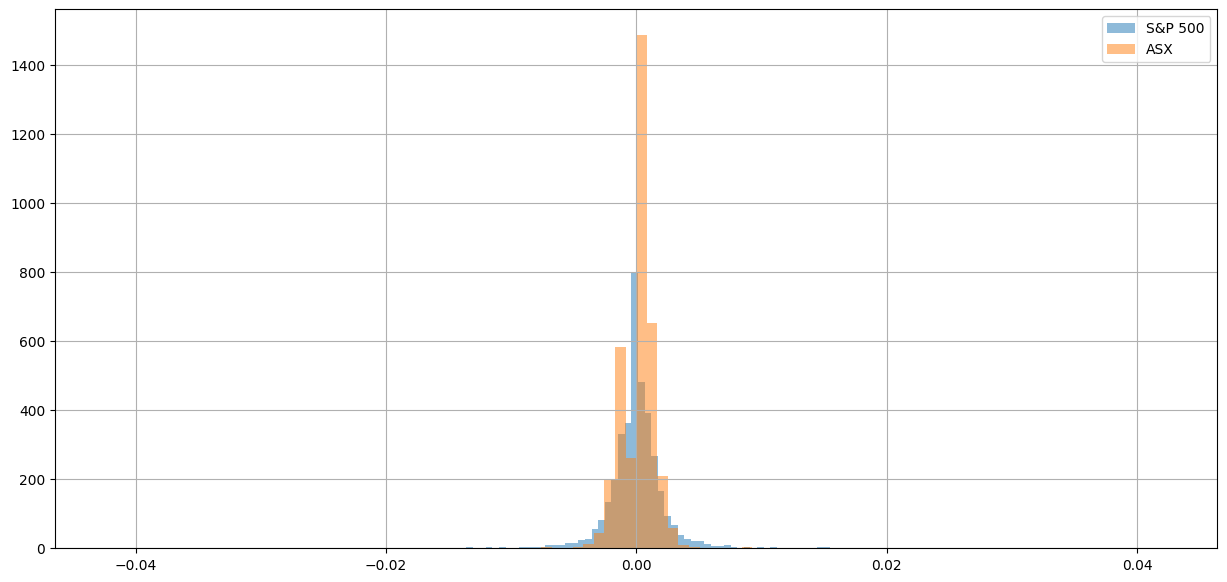

In [95]:
# volatility in closing price with respect to previous day closing price
data1['returns'] = (data1['Close']/data1['Close'].shift(1)) -1
data2['returns'] = (data2['Close']/data2['Close'].shift(1))-1

data1['returns'].hist(bins = 100, label = 'S&P 500', alpha = 0.5, figsize = (15,7))
data2['returns'].hist(bins = 100, label = 'ASX', alpha = 0.5)

plt.legend()

In [98]:
# pull out second last value from the series
SP_last_change = SP_percent_change[-2]
ASX_last_change = ASX_percent_change[-2]
print(SP_last_change, ASX_last_change)

-0.001941747572815511 -0.0017889087656529634


In [99]:
# if absolute value of the last_change is above certain action do this
if abs(ASX_last_change) > 0.007:
    print("ASX Alert:" + ASX_last_change)
else:
    print("No change in second last value")

No change in second last value


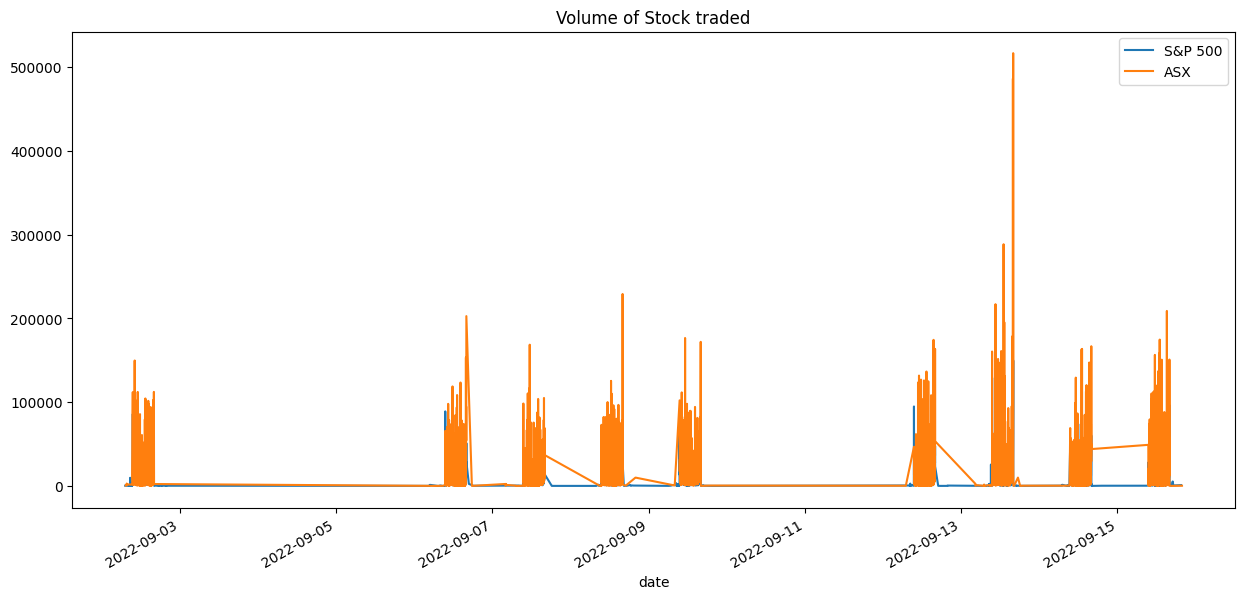

In [100]:
# volume of stocks traded by each company
data1['Volume'].plot(label = 'S&P 500', figsize = (15,7))
data2['Volume'].plot(label = "ASX")
plt.title('Volume of Stock traded')
plt.legend()

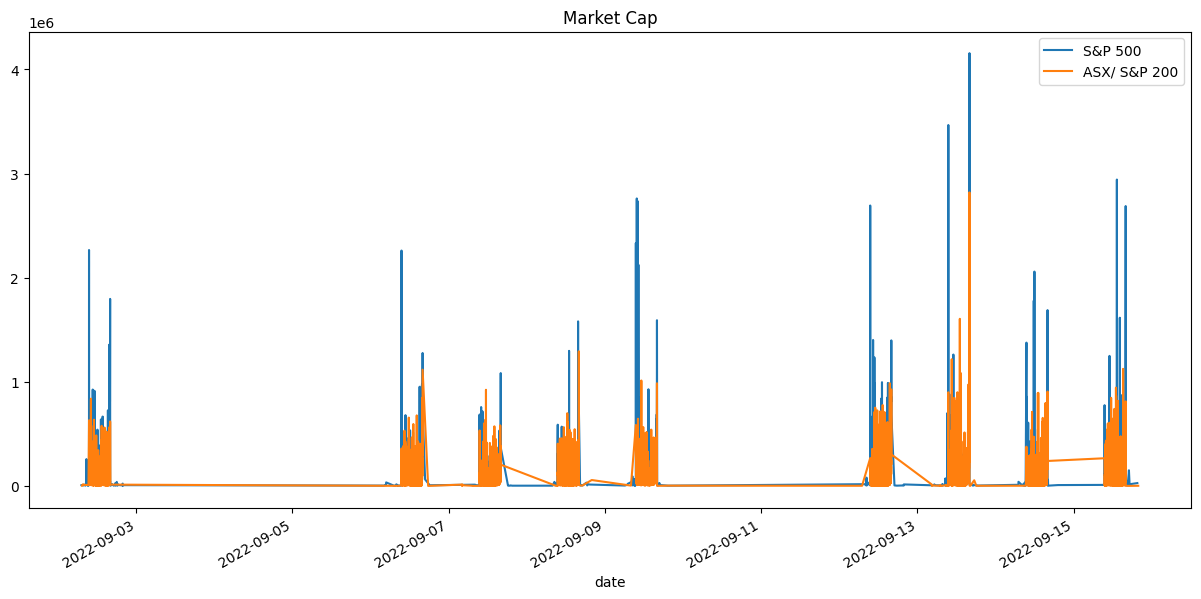

In [101]:
# Calculate Market capitalization by multiplying volume in a day to opening share price
data1['MarketCap'] = data1['Open'] * data1['Volume']
data2['MarketCap'] = data2['Open'] * data2['Volume']

data1['MarketCap'].plot(label = 'S&P 500', figsize = (15,7))
data2['MarketCap'].plot(label = 'ASX/ S&P 200')

plt.title('Market Cap')
plt.legend()

<AxesSubplot: xlabel='date'>

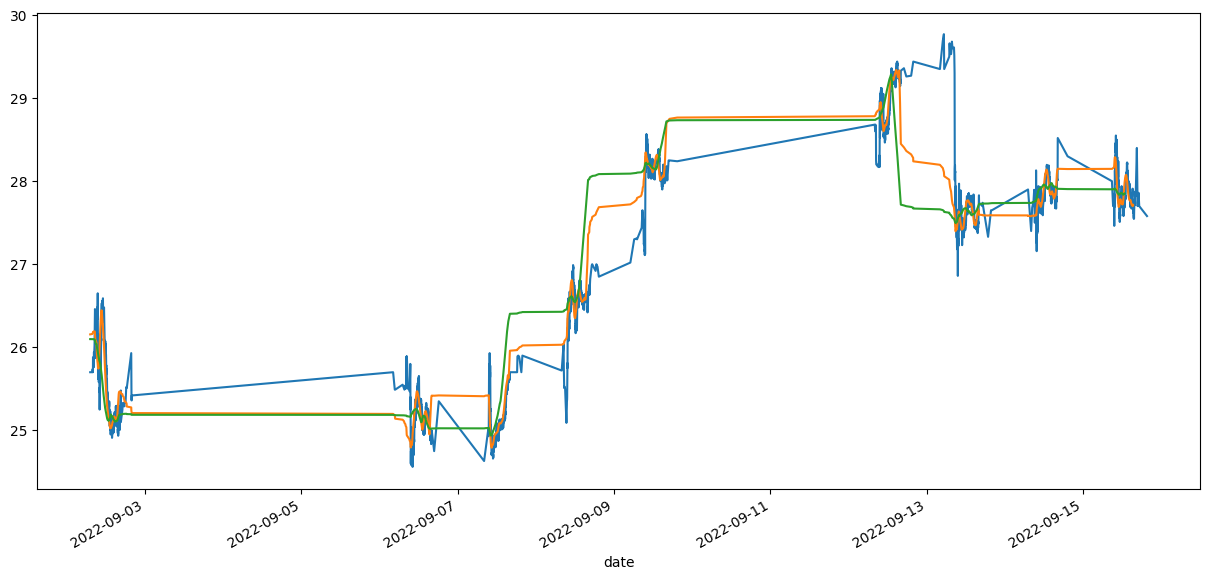

In [66]:
# Moving averages for S&P 500
data1['MA50'] = data1['Open'].rolling(50).mean()
data1['MA200'] = data1['Open'].rolling(200).mean()
data1['Open'].plot(figsize = (15,7))
data1['MA50'].plot()
data1['MA200'].plot()



<AxesSubplot: xlabel='date'>

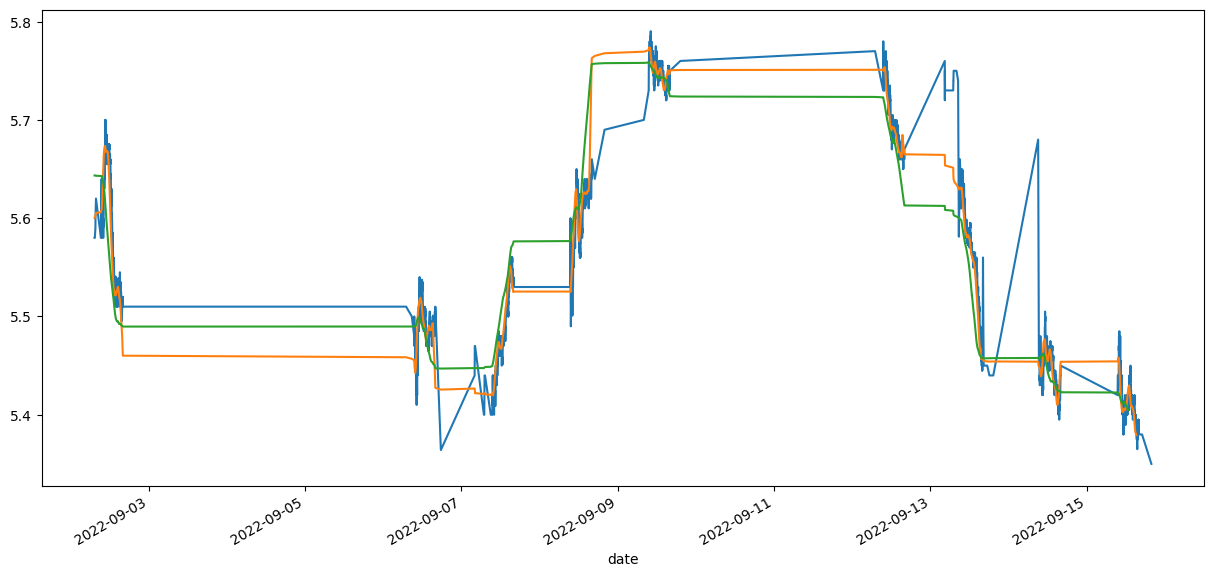

In [67]:
# Moving averages for S&P 200/ ASX
data2['MA50'] = data2['Open'].rolling(50).mean()
data2['MA200'] = data2['Open'].rolling(200).mean()
data2['Open'].plot(figsize = (15,7))
data2['MA50'].plot()
data2['MA200'].plot()

array([[<AxesSubplot: xlabel='S&P 500 Open', ylabel='S&P 500 Open'>,
        <AxesSubplot: xlabel='ASX Open', ylabel='S&P 500 Open'>],
       [<AxesSubplot: xlabel='S&P 500 Open', ylabel='ASX Open'>,
        <AxesSubplot: xlabel='ASX Open', ylabel='ASX Open'>]],
      dtype=object)

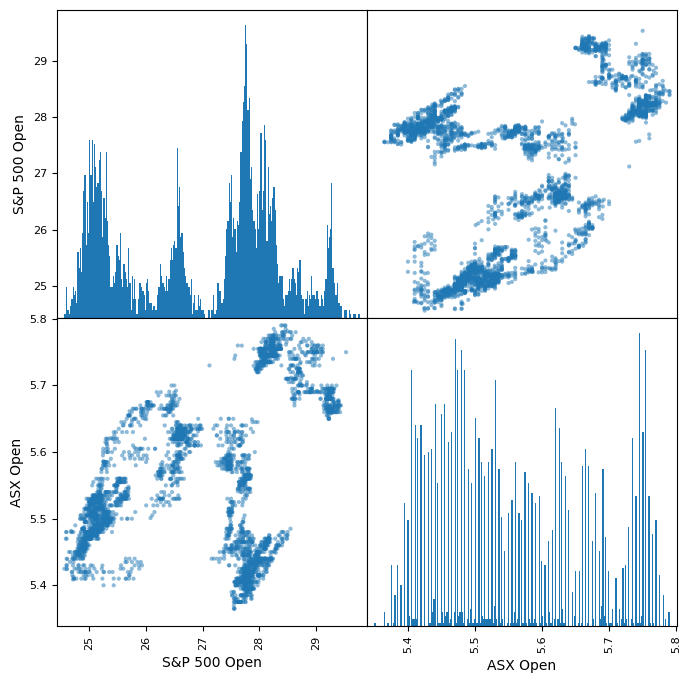

In [104]:
# scattered plot matrix
# displays the histogram of each company
data = pd.concat([data1['Open'],data2['Open']],axis = 1)
data.columns = ['S&P 500 Open','ASX Open']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250})